In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from datetime import datetime
import os, glob, shutil, zipfile, random

# 폰트 관리자
import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname="C:\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font",family=font_name)

# 음수 표현
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"]=False

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


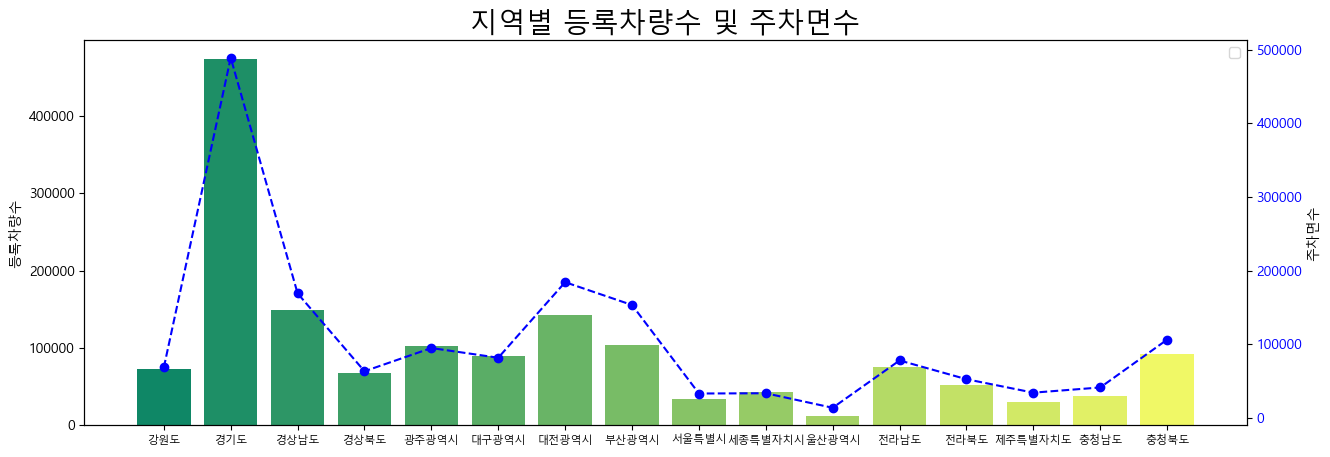

In [4]:
X_train = pd.read_csv('data/pre_train.csv')
X_test = pd.read_csv('data/pre_test.csv')
car_reg = pd.read_csv('data/자동차수.csv', index_col=0)

# 등록대수 데이터 인덱스 변경
car_reg.set_index("항목", inplace=True)

# 지역별 등록 대수 , 주차면수 dataFrame 
si_car_reg = X_train.groupby("지역")[["등록차량수","주차면수"]].sum()

# 막대-꺾은선 그래프 시각화
fig=plt.figure(figsize=(15,5))
fig.set_facecolor("white")
ax1 = fig.add_subplot() ## axes 생성

colors = sns.color_palette('summer', len(si_car_reg.index)) ## 바 차트 색상
xtick_label_position = list(range(len(si_car_reg.index))) ## x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) ## x축 눈금 
ax1.set_xticklabels(si_car_reg.index, fontsize=8) ## x축 눈금 라벨
ax1.bar(xtick_label_position, si_car_reg["등록차량수"], color=colors) ## 바차트 출력
ax1.set_ylabel("등록차량수")

ax2 = ax1.twinx() ## 새로운 axis 생성
ax2.plot(xtick_label_position, si_car_reg["주차면수"], color="blue", linestyle='--', marker='o') ## 선 그래프 
ax2.tick_params(axis='y', labelcolor="blue") ## 눈금 라벨 색상 지정
ax2.set_ylabel("주차면수")

plt.title('지역별 등록차량수 및 주차면수', fontsize=20)
plt.legend()
plt.show()